<a href="https://colab.research.google.com/github/rafhaelom/DataScience/blob/master/Aula_01_quarentena_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aula 01 - Lendo dados do MovieLens**

## Introdução

Olá seja bem-vinda ou bem-vindo ao **notebook da aula01**, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina.

### Primeira base de dados (dataset), contém informações sobre os filmes.

In [ ]:
# Importando biblioteca pandas: Ferramenta de manipulação e análise de dados de código aberto (open source). 
import pandas as pd

In [ ]:
# Definindo nome do DataFrame e lendo o arquivo CSV da MovieLens com informações sobre os filmes.
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

# Lendo as 5 primeiras linhas do DataFrame.
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Descobrindo a "forma" ou dimensionalidade (tamanho) dos dados do DataFrame.
# Nos retorna a quantidade de linhas e a quantidade de colunas.
filmes.shape

(9742, 3)

In [ ]:
# Se só queremos saber a quantidade de linhas.
len(filmes)

9742

In [ ]:
# Substituindo nomes das colunas do DataFrame filmes.
filmes.columns = ["filmeId", "titulo", "generos"]

# Lendo as 5 primeiras linhas com nomes substituidos do DataFrame.
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Segunda base de dados (dataset), contém as avaliações dos filmes.

In [ ]:
# Definindo nome do DataFrame e lendo o arquivo CSV da MovieLens com as avaliações dos filmes.
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

# Lendo as 5 primeiras linhas.
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Descobrindo a "forma" ou dimensionalidade (tamanho) dos dados no DataFrame.
# Nos retorna a quantidade de linhas e a quantidade de colunas.
avaliacoes.shape

(100836, 4)

In [ ]:
# Se só queremos saber a quantidade de linhas.
len(avaliacoes)

100836

In [ ]:
# Substituindo nomes das colunas do DataFrame avaliacoes.
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

# Lendo as 5 primeiras linhas com nomes substituidos do DataFrame.
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Podemos "separar" ou descobrir as notas de apenas um determinado filme deste dataset.

#### Vamos descobrir as notas do filmeId 1, ou seja, vamos descobrir quantas avaliações ele possui.

In [ ]:
# Criando uma variável com informação das avaliações do filme com Id igual a 1.
avaliacoes_do_filme_1 = avaliacoes.query("filmeId == 1")

# Lendo as 5 primeiras linhas.
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


### Analisaremos mais um filme, neste caso vamos descobrir quantas avaliações possui o filme com Id igual a 5, ou seja, o filme da posição 5.

In [ ]:
# Criando uma variável com informação das avaliações do filme com Id igual a 5.
avaliacoes_do_filme_5 = avaliacoes.query("filmeId == 5")

# Lendo as 5 primeiras linhas.
avaliacoes_do_filme_5.head()

,usuarioId,filmeId,nota,momento
563,6,5,5.0,845553938
4880,31,5,3.0,850466642
6317,43,5,5.0,848994281
6478,45,5,3.0,959625102
8512,58,5,4.0,847719151


### Podemos perceber e chegar numa conclusão que provavelmente cada filme tem uma ou mais de uma avaliação, como já esperado.

### Agora vamos descobrir quantas avaliações temos do filme 1.

In [ ]:
# Descobrindo através da função "shape" quantas avaliações temos do filme com Id igual a 1.
# Retorna quantas linhas e colunas se tem.
avaliacoes_do_filme_1.shape

(215, 4)

### Agora vamos descobrir quantas avaliações temos do filme 5.

In [ ]:
# Descobrindo através da função "shape" quantas avaliações temos do filme com Id igual a 5.
# Retorna quantas linhas e colunas se tem.
avaliacoes_do_filme_5.shape

(49, 4)

### Podemos perceber que cada filme possui uma quantidade específica de avaliações.

## A partir desta descoberta, iremos calcular a média de dois filmes e logo após de cada filme, e a partir dela, definir uma coluna nova com a média das notas de cada filme.

In [ ]:
# Descobrindo a distribuição de todas as notas das avaliações de todos os filmes.
avaliacoes["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
# A média de todas as notas, a média geral.
avaliacoes["nota"].mean()

3.501556983616962

In [ ]:
# A média de nota das avaliações do filme 1
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [ ]:
# A média de nota das avaliações do filme 5
avaliacoes_do_filme_5["nota"].mean()

3.0714285714285716

## Foi calculado a média geral, a média do filme 1 e a média do filme 5. Vamos calcular a média de cada filme.

### Assim teremos apenas um dado de nota, com base em todas as notas dispostas por filme, ou seja, teremos a média de todas as notas das avalições por cada filme.

In [ ]:
# Criando uma variável com a média das notas para cada filme.
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

# Lendo as 5 primeiras linhas.
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Como foi visto na aula, temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [ ]:
# Dados do DataFrame filmes.
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Dados do DataFrame notas média por filme.
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
# Criando uma nova variável com a juunção dos dados dos dois DataFrames com a função "join".
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

# Lendo os dados deste novo DataFrame após a junção.
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [ ]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

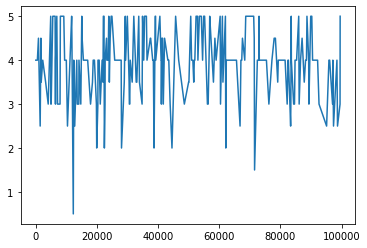

In [ ]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

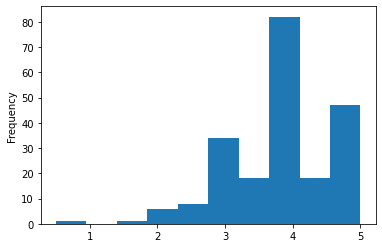

In [ ]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise? 

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um *line plot*, agora pense em uma [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal). **Você acha que o gráfico de linhas ainda seria uma má ideia?**

Antes de analisar os histogramas de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!

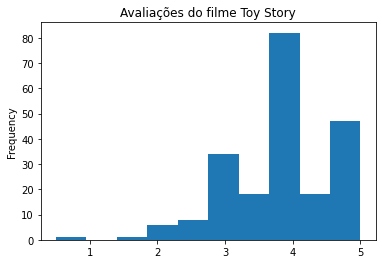

In [ ]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o [matplotlib](https://matplotlib.org/).

Que tal experimentar um pouquinho esta poderosa ferramenta? 

Vamos importar a lib e adicionar título no gráfico usando o matplotlib, veja como fica na célula a seguir.

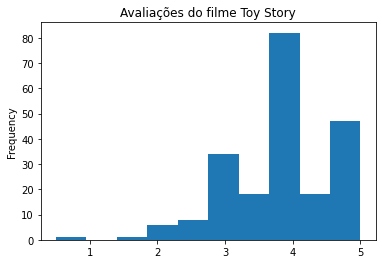

In [ ]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?

Vamos plotar o histograma do filme Jumanji e da animação Liga da justiça: Doom.

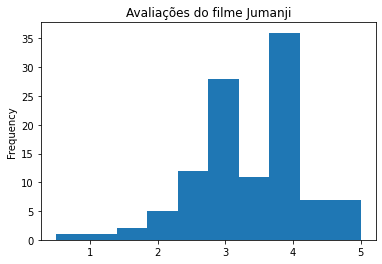

In [ ]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Jumanji")

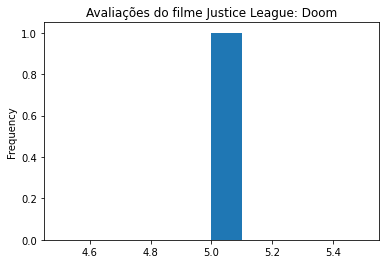

In [ ]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

In [ ]:
# Agora vamos descobrir qual filme é o do Id 5.
filme_5 = filmes.query("filmeId == 5")["titulo"]

# Descobrindo o nome deste filme.
filme_5

4    Father of the Bride Part II (1995)
Name: titulo, dtype: object

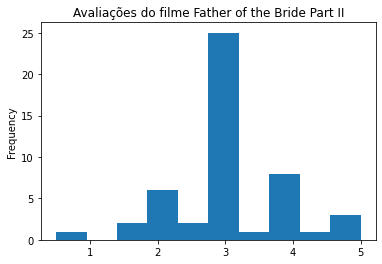

In [ ]:
# E o histograma do filme 5.
avaliacoes.query("filmeId == 5")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Father of the Bride Part II")

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [ ]:
# Criando uma nova variável e descobrindo a partir dela quais os filmes sem notas de avaliações, através da função "isnull()".
filmes_sem_avaliacao = filmes_com_media[filmes_com_media["nota"].isnull()]

# Descobrindo a quantidade de filmes com função "len()"
len(filmes_sem_avaliacao)

18

In [ ]:
# Descobrindo quais são os filmes
filmes_sem_avaliacao

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [ ]:
# Mostrando como são os nomes das colunas.
filmes_com_media.columns

Index(['filmeId', 'titulo', 'generos', 'nota'], dtype='object')

In [ ]:
# Alterando o nome da coluna.
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.columns

Index(['filmeId', 'titulo', 'generos', 'nota_media'], dtype='object')

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [ ]:
# Criando uma nova variavél com o total de notas por filme
total_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['nota'].count()

# Descobrindo o total de avaliações por filme.
total_avaliacoes_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [ ]:
# Definindo uma nova variável com a quantidade de notas por filme e o dataset dos filmes com média das notas de cada filmes.
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')

# Verificando como ficou após a junção.
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [ ]:
# Alterando o nome da coluna nota por total de avalicoes.
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_avaliacoes'})

# Lendo as 5 primeiras linhas e verificando.
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [ ]:
filmes_com_media_e_votos['nota_media'] = filmes_com_media_e_votos['nota_media'].round(2)
filmes_com_media_e_votos 

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega).

In [ ]:
generos_df = filmes_com_media_e_votos.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [ ]:
total_filmes_por_genero = filmes_com_media_e_votos.generos.str.get_dummies().sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

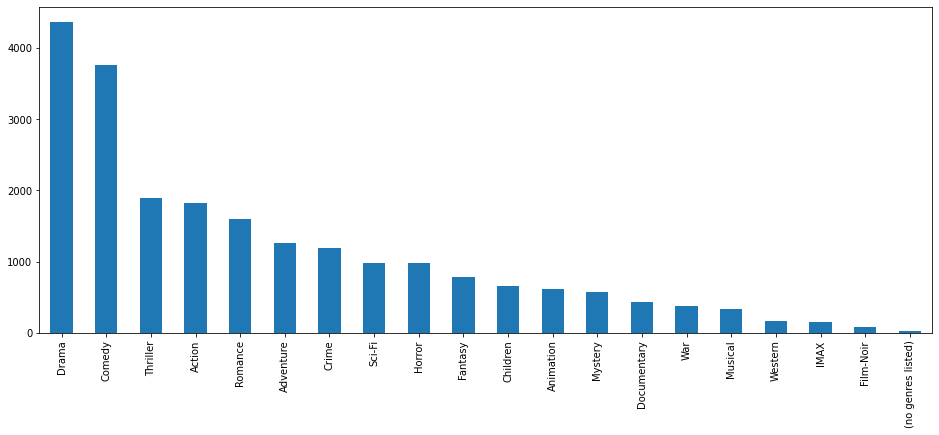

In [ ]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))

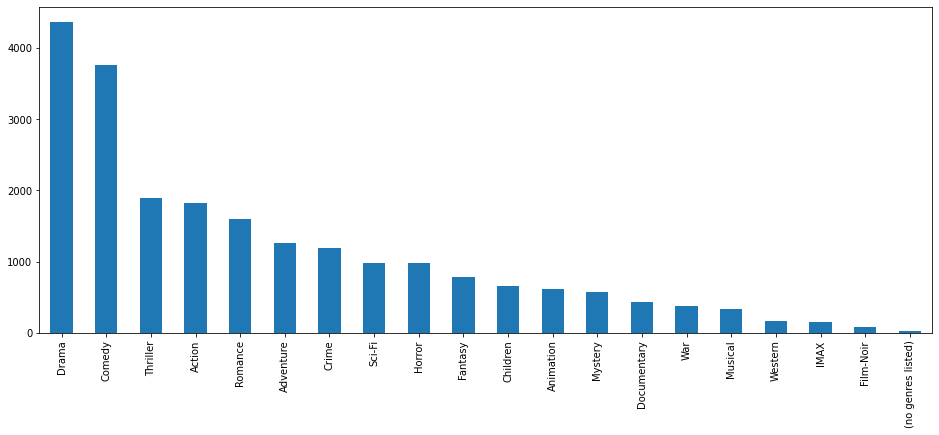

In [ ]:
# Retirando informações antes do gráfico ser apresentado que estão < >.
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6));

# Muito boa a Aula 01, gostei muito de participar, muito aprendizado, pude relembrar comandos do Python, da Biblioteca Pandas, do Google.Colab, etc.